In [1]:
!pip -qqqq install odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data

In [4]:
!cp -r "/content/drive/MyDrive/Colab Notebooks/proy/Agetic/data" .

In [5]:
dir = "/content/data/"

In [73]:
def code_of_file(file_data = None, file_codes = None):
  
  register_codes = [row.strip()[:].replace("[",".").replace("]",".") for row in file_codes["Código"]]
  count_codes = []

  for column in (file_data.columns):

    cod = [row.strip()[:len(column.strip())].replace("[",".").replace("]",".") for row in file_codes["Código"]]
    if column.strip() in cod and column.strip() not in count_codes:
          index_cod = cod.index(column.strip())
          file_data.rename(columns={column:file_codes["Descripción"][index_cod]}, inplace=True)
          register_codes[index_cod] = "~"
          count_codes.append(column.strip())
    elif column.strip() in cod and column.strip() in count_codes:
          print(f'Duplicate for {cod}')
    else:
          print(f"Not found {column}")

  for code in register_codes:
    if code != "~":
      print(f"Códigos restantes {code}")
  print(register_codes)
  print(count_codes)
  
  return file_data

In [11]:
!ls data/inicial

diccionario_variables_directores.ods  estudiantes_1f.csv
diccionario_variables_profesores.ods  profesores_inicial_1fase.csv
directores_inicial_1fase.csv	      voluntarios_1f.csv


In [12]:
!ls data/final

diccionario-de-variables-final-directores.ods	directores_fin.csv
diccionario-de-variables-final-estudiantes.ods	estudiantes_fin.csv
diccionario-de-variables-final-profesores.ods	profesores_fin.csv
diccionario-de-variables-final-voluntarios.ods	voluntarios_fin.csv


In [86]:
path_data = (dir+ "final/voluntarios_fin.csv")
df = pd.read_csv(path_data) 
df.head(2)

,a1,a2,a3,a4,a40,b1,b2,c1,c2,c3,...,m2,m3,m4,m5,m6,m7,m71,m8,m9,m10
0,Masculino,31,Santa Cruz,Santa Cruz de la Sierra,RAMON DARIO GUTIERREZ A,"Estudiante de Informática, Ing. de Sistemas, E...",1 año o menos,Sí,Escritorio,2.0,...,"Porque a pesar de los problemas sociales, los ...",mucho,Es precisamente por el hecho de llegar mas apt...,Sí,Porque son herramientas que ellos pueden con s...,buena,Hubo maestros muy interesados en capacitarse y...,Sí,Para una próxima implementación del proyecto y...,"Simplemente empezar el proyecto mas antes, es ..."
1,Masculino,27,Oruro,Machacamarca,PEDRO DOMINGO MURILLO 2,"Estudiante de Informática, Ing. de Sistemas, E...",1 año o menos,Sí,Escritorio,3.0,...,Las capacitaciones se realizaron de manera ac...,mucho,"El aprender y enseñar se facilita, permitiendo...",Sí,La mejor manera de aprender es practicando y l...,excelente,"El entusiasmo fue contagioso, la adaptación de...",Sí,La practica es la mejor manera de aprender y e...,-Recomendación: Se debería evaluar la distanci...


In [90]:
code_data = (dir+ "final/diccionario-de-variables-final-voluntarios.ods")
codes = pd.read_excel(code_data, engine="odf") 
codes.head(2)

,Código,Descripción
0,a1,¿Cuál es su sexo?
1,a2,¿Cuántos años tiene?


In [88]:
df = code_of_file(file_data = df, file_codes = codes)

Not found a40
Códigos restantes a42
Códigos restantes a43
Códigos restantes a44
Códigos restantes a45
Códigos restantes a46
Códigos restantes a47
Códigos restantes a48
Códigos restantes a49
Códigos restantes a411
Códigos restantes a412
Códigos restantes a421
Códigos restantes a422
Códigos restantes a423
Códigos restantes a431
Códigos restantes a432
Códigos restantes a441
Códigos restantes a442
Códigos restantes a451
Códigos restantes a461
Códigos restantes a462
Códigos restantes a463
Códigos restantes a464
Códigos restantes a465
Códigos restantes a466
Códigos restantes a471
Códigos restantes a481
Códigos restantes a491
Códigos restantes a492
Códigos restantes a5
Códigos restantes a6
['~', '~', '~', '~', 'a42', 'a43', 'a44', 'a45', 'a46', 'a47', 'a48', 'a49', 'a411', 'a412', 'a421', 'a422', 'a423', 'a431', 'a432', 'a441', 'a442', 'a451', 'a461', 'a462', 'a463', 'a464', 'a465', 'a466', 'a471', 'a481', 'a491', 'a492', 'a5', 'a6', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~', '~',

In [89]:
df.head(2)

,¿Cuál es su sexo?,¿Cuántos años tiene?,¿En qué departamento se encuentra la unidad educativa del cual es voluntario?,¿En qué ciudad se encuentra la unidad educativa del cual es voluntario?,a40,Nivel de Instrucción que posee,¿Cuantos años de experiencia tiene en enseñanza?,¿Tienen computadora en su casa?,¿Es una computadora de escritorio o una laptop?,¿Cuántas computadoras tiene?,...,¿Por qué?,¿Crees que el uso de tecnologías puede ser útil para el Proceso de Educación y Aprendizaje?,¿Por qué?,¿Crees que el uso de tecnologías y herramientas de software libre mejoró el aprendizaje de los estudiantes?,¿Por qué?,¿Cómo calificas la labor de los profesores en el aula?,¿Por qué?,Con fases de capacitación mas intensivas ¿crees que se puede adecuar las clases para los estudiantes a este nuevo modelo de enseñanza aprendizaje que incorpora las TIC?,¿Por qué?,Tienes alguna recomendación u observación para el proyecto Inclusión Digital.
0,Masculino,31,Santa Cruz,Santa Cruz de la Sierra,RAMON DARIO GUTIERREZ A,"Estudiante de Informática, Ing. de Sistemas, E...",1 año o menos,Sí,Escritorio,2.0,...,"Porque a pesar de los problemas sociales, los ...",mucho,Es precisamente por el hecho de llegar mas apt...,Sí,Porque son herramientas que ellos pueden con s...,buena,Hubo maestros muy interesados en capacitarse y...,Sí,Para una próxima implementación del proyecto y...,"Simplemente empezar el proyecto mas antes, es ..."
1,Masculino,27,Oruro,Machacamarca,PEDRO DOMINGO MURILLO 2,"Estudiante de Informática, Ing. de Sistemas, E...",1 año o menos,Sí,Escritorio,3.0,...,Las capacitaciones se realizaron de manera ac...,mucho,"El aprender y enseñar se facilita, permitiendo...",Sí,La mejor manera de aprender es practicando y l...,excelente,"El entusiasmo fue contagioso, la adaptación de...",Sí,La practica es la mejor manera de aprender y e...,-Recomendación: Se debería evaluar la distanci...


In [ ]:
cod = [row.strip()[:len(column.strip())].replace("[",".").replace("]",".") for row in df2_cod["Código"]]

for column in (df2.columns):
  if column.strip() in cod:
        index_cod = cod.index(column.strip())
        df2.rename(columns={column:df2_var["Descripción"][index_cod]}, inplace=True)
        cod[index_cod] = "~"
  else:
        print(f"Not found {column}")

for code in cod:
  if code != "~":
    print(f"Códigos restantes {code}")

# Data analysis

In [ ]:
df.shape, df2.shape

((317, 98), (332, 109))

In [ ]:
df.describe(include="all")

,a1. ¿Cuál es su sexo?,a2. ¿Cuántos años tiene?,a3. ¿En qué departamento se encuentra la unidad educativa del cual es voluntario?,¿En qué ciudad se encuentra la unidad educativa en el cual será voluntario?,¿Cuál es la Unidad Educativa donde será voluntario?,b1. Nivel de Instrucción que posee,b2. ¿Cuantos años de experiencia tiene en enseñanza?,c1. ¿Tienen computadora en su casa?,c2. ¿Es una computadora de escritorio o una laptop?,c3. ¿Cuántas computadoras tiene?,...,"f3[f36]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Audacity (Editor de audio)]","f3[f37]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Openshot (Editor de video )]","f3[f38]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Wordpress (Sistema para crear siios web)]","f3[f39]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Sozi (Presentaciones)]","f3[f310]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Inkscape (Edición de imágenes vectoriales)]","f3[f311]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Ninguno]","f3[other]. De los programas que se menciona a continuación, ¿Cuáles utilizas? [Otro]",g1. ¿Sabe lo que son las licencias libres?,g2. ¿Sabe lo que es el conocimiento abierto?,g3. ¿Sabe qué son los datos abiertos?
count,317,317.000000,317,317,317,317,317,317,308,308.000000,...,243,227,238,226,224,223,5,317,317,317
unique,2,NaN,6,13,158,2,6,2,2,NaN,...,2,2,2,2,2,2,5,2,2,2
top,Femenino,NaN,La Paz,El Alto,LOYOLA DE FE Y ALEGRIA B,"Estudiante de Informática, Ing. de Sistemas, E...",1 año o menos,Sí,Laptop,NaN,...,No,No,No,No,No,No,Cura,Sí,Sí,Sí
freq,171,NaN,119,72,6,212,131,308,210,NaN,...,128,142,158,148,150,190,1,265,247,207
mean,NaN,26.148265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.685065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,3.844292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.851233,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,19.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2.describe(include="all")

,¿Cuál es su sexo?,¿Cuántos años tiene?,¿En qué departamento se encuentra la unidad educativa del cual es voluntario?,a4,a40,Nivel de Instrucción que posee,¿Cuantos años de experiencia tiene en enseñanza?,¿Tienen computadora en su casa?,¿Es una computadora de escritorio o una laptop?,¿Cuántas computadoras tiene?,...,¿Por qué?,¿Crees que el uso de tecnologías puede ser útil para el Proceso de Educación y Aprendizaje?,¿Por qué?,¿Crees que el uso de tecnologías y herramientas de software libre mejoró el aprendizaje de los estudiantes?,¿Por qué?,¿Cómo calificas la labor de los profesores en el aula?,¿Por qué?,Con fases de capacitación mas intensivas ¿crees que se puede adecuar las clases para los estudiantes a este nuevo modelo de enseñanza aprendizaje que incorpora las TIC?,¿Por qué?,Tienes alguna recomendación u observación para el proyecto Inclusión Digital.
count,332,332.000000,332,332,332,332,332,332,322,322.000000,...,286,332,280,332,275,332,271,332,260,275
unique,2,NaN,9,16,188,2,6,2,2,NaN,...,286,2,280,2,275,4,271,2,260,269
top,Masculino,NaN,La Paz,El Alto,JESUS DE NAZARETH Tarde,"Estudiante de Informática, Ing. de Sistemas, E...",1 año o menos,Sí,Laptop,NaN,...,"Porque a pesar de los problemas sociales, los ...",mucho,Es precisamente por el hecho de llegar mas apt...,Sí,Porque son herramientas que ellos pueden con s...,buena,Hubo maestros muy interesados en capacitarse y...,Sí,Para una próxima implementación del proyecto y...,No
freq,166,NaN,141,82,3,220,151,322,230,NaN,...,1,315,1,307,1,212,1,310,1,5
mean,NaN,26.003012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.692547,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,4.097378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.890521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.columns

Index(['a1. ¿Cuál es su sexo? ', 'a2. ¿Cuántos años tiene?',
       'a3. ¿En qué departamento se encuentra la unidad educativa del cual es voluntario?    ',
       ' ¿En qué ciudad se encuentra la unidad educativa en el cual será voluntario?',
       ' ¿Cuál es la Unidad Educativa donde será voluntario?',
       'b1. Nivel de Instrucción que posee',
       'b2. ¿Cuantos años de experiencia tiene en enseñanza?',
       'c1. ¿Tienen computadora en su casa?',
       'c2. ¿Es una computadora de escritorio o una laptop?',
       'c3. ¿Cuántas computadoras tiene?', 'c4. ¿Tienen tabletas en su casa?',
       'c5. ¿Cuántas tabletas tienen en casa?',
       'c6. ¿Cuántos días a la semana utilizas una computadora?',
       'c7. ¿De qué lugar accedes a una computadora con mayor frecuencia?',
       'c7[other]. ¿De qué lugar accedes a una computadora con mayor frecuencia? [Otro]',
       'c8[c81]. ¿Qué uso le das a las computadoras(escritorio, portátil o tablet )? [Trabajo]',
       'c8[c82]. ¿Qué

In [ ]:
df2.columns

Index(['¿Cuál es su sexo? ', '¿Cuántos años tiene?',
       '¿En qué departamento se encuentra la unidad educativa del cual es voluntario?    ',
       'a4', 'a40', 'Nivel de Instrucción que posee',
       '¿Cuantos años de experiencia tiene en enseñanza?',
       '¿Tienen computadora en su casa?',
       '¿Es una computadora de escritorio o una laptop?',
       '¿Cuántas computadoras tiene?',
       ...
       '¿Por qué?',
       '¿Crees que el uso de tecnologías puede ser útil para el Proceso de Educación y Aprendizaje? ',
       '¿Por qué?',
       '¿Crees que el uso de tecnologías y herramientas de software libre mejoró el aprendizaje de los estudiantes?',
       '¿Por qué?', '¿Cómo calificas la labor de los profesores en el aula?',
       '¿Por qué?',
       'Con fases de capacitación mas intensivas ¿crees que se puede adecuar las clases para los estudiantes a este nuevo modelo de enseñanza aprendizaje que incorpora las TIC?',
       '¿Por qué?',
       'Tienes alguna recomendació

In [ ]:
df.columns[0]

'a1. ¿Cuál es su sexo? '

In [ ]:
sns.__version__

'0.12.2'

In [ ]:
dfe = sns.load_dataset("titanic")
sns.countplot(x=dfe["class"])

In [ ]:
dfe["class"].head()

0    Third
1    First
2    Third
3    First
4    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']

In [ ]:
type(dfe["class"])

pandas.core.series.Series

In [ ]:
#!pip install seaborn==0.11.2

In [ ]:
type(df[df.columns[0]])

pandas.core.series.Series

In [ ]:
print(df.columns[0])

a1. ¿Cuál es su sexo? 


In [ ]:
sns.countplot(x=df[df.columns[0]], data=df)

In [ ]:
for colet in df.columns:
  counter = df[colet].value_counts().to_frame()
  sns.countplot(x=df[colet], data=df)
  plt.show()
  
  print(counter)
  print(" ")

In [ ]:
len(counter)

116

In [ ]:
for colet in df2.columns:
  try:
    counter = df2[colet].value_counts().to_frame()
    if len(counter) <= 15:
      sns.countplot(x=df2[colet], data=df2)
      plt.show()
    else:
        pass
    
  except:
    pass
  
  #print(counter)
  print(" ")

# Valores perdidos

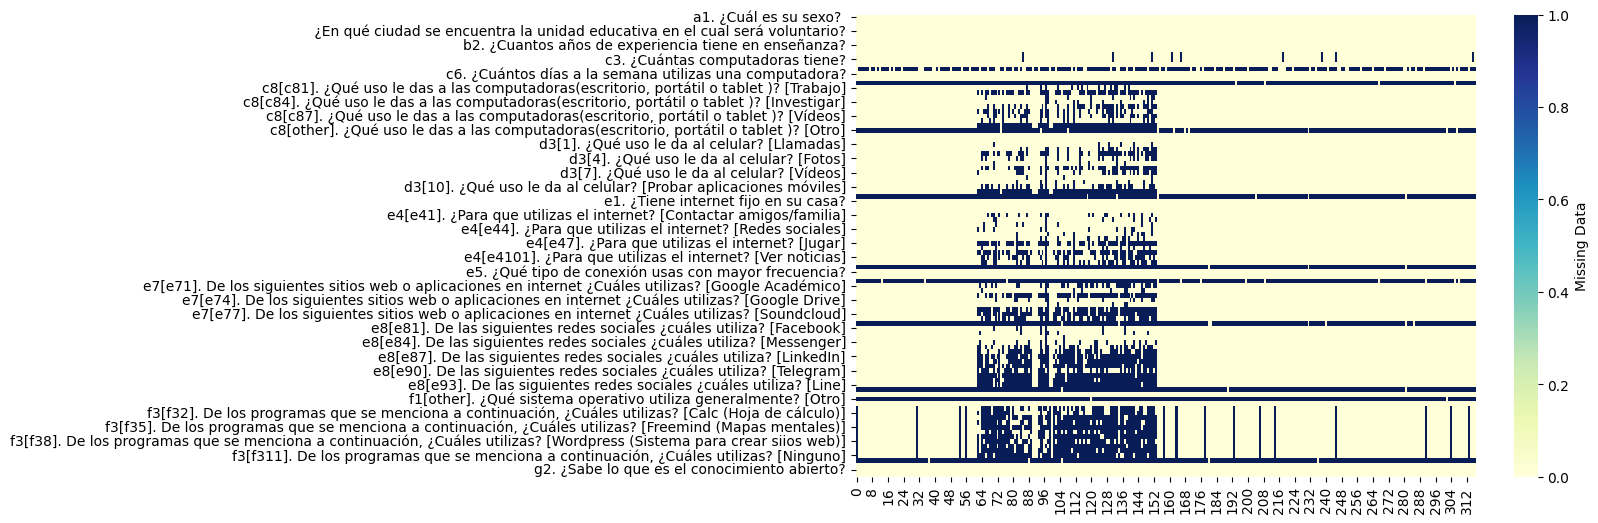

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.savefig("visualizing_missing_data_with_heatmap_Seaborn_Python.png", dpi=100)
plt.show()

In [ ]:
plt.figure(figsize=(40,40))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)
plt.show()

# Correlaciones

/tmp/ipykernel_24035/878815093.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax); # sns.heatmap(df.corr(annot=True))  view a color-encoded grid of all pair-wise correlations


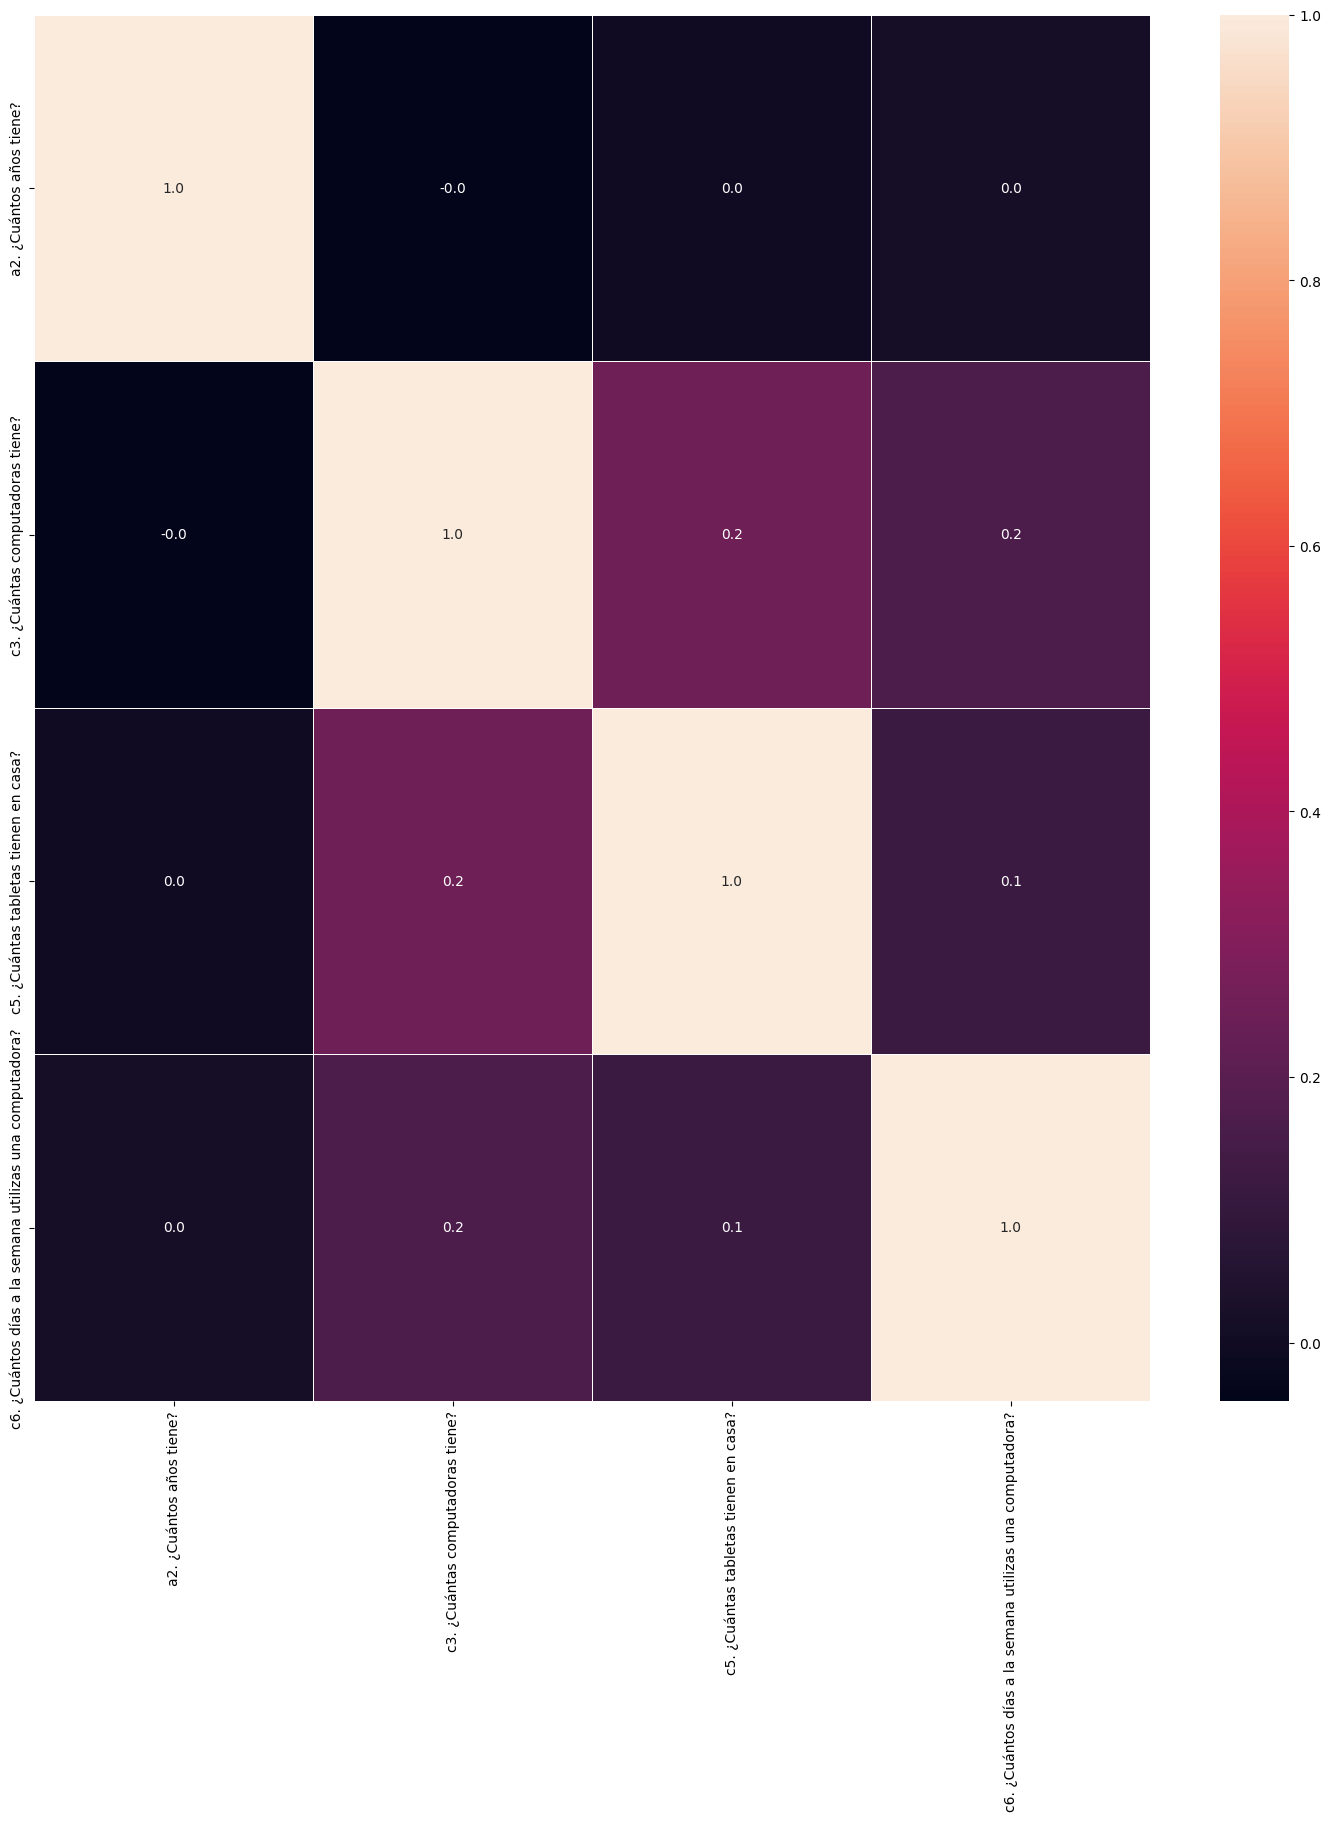

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax); # sns.heatmap(df.corr(annot=True))  view a color-encoded grid of all pair-wise correlations

In [ ]:
!pip install missingno

  Using cached missingno-0.5.1-py3-none-any.whl (8.7 kB)
     ━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/30.9 MB 54.6 kB/s eta 0:07:59m

In [ ]:
import missingno
missingno.matrix(df)

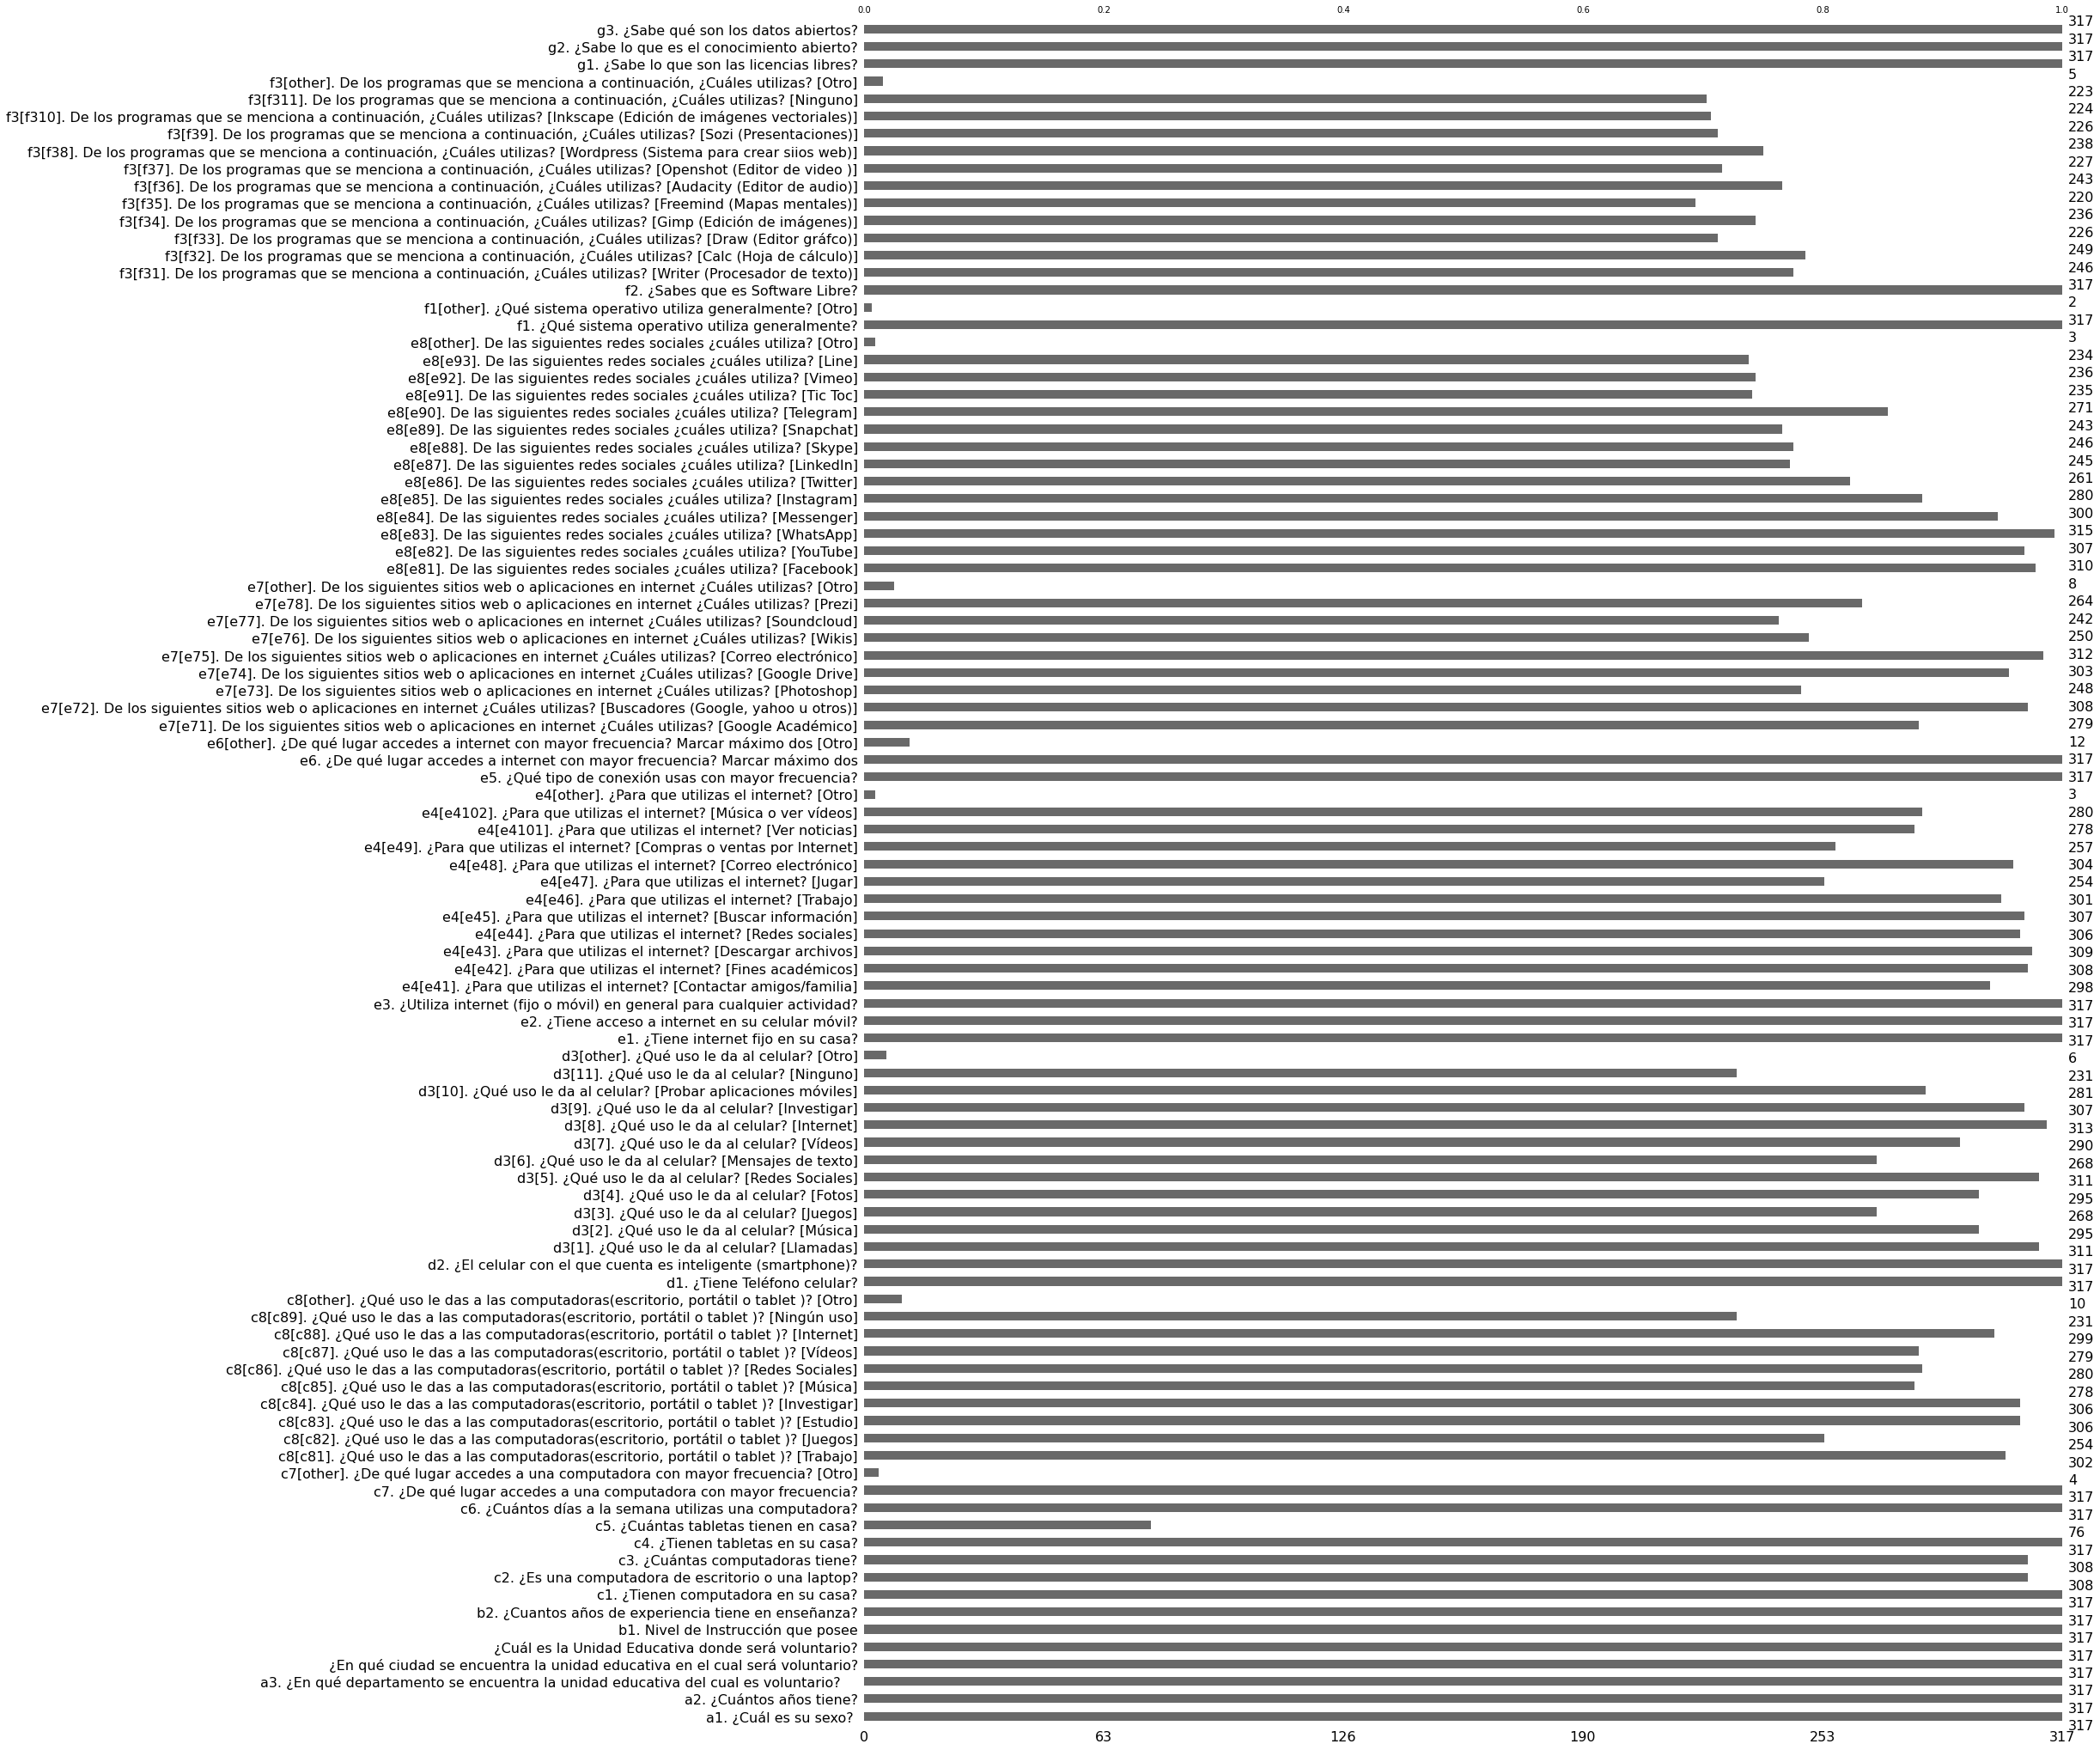

In [ ]:
missingno.bar(df)

In [ ]:
plt.figure(figsize=(25,15))
sns.boxplot(data=df)
plt.show()

NameError: ignored

In [ ]:
dfl = df['k3.  Describa brevemente acerca del "Proyecto Inclusión Digital"']
dfl = dfl.dropna( axis= 0)

In [ ]:
dfl

13      Como su nonbre lo dice incluir y orientar a la...
15                                               Es buena
25      La inclusión digital es la democratización del...
57                     que esta integrada a la tecnologia
95                                               Es buena
                              ...                        
2062                      Es el acceso de las tecnologias
2068    Este proyecto se trata de que debemos de meter...
2085    Creo que estamos en una era donde la inclusión...
2105      Creo que incorporar la tecnología a la sociedad
2142                                      no se casi nada
Name: k3.  Describa brevemente acerca del "Proyecto Inclusión Digital", Length: 156, dtype: object

In [ ]:
texto = ''
for i in dfl:
  texto = str(texto) +str(i)
  print(i)

Como su nonbre lo dice incluir y orientar a la juventud estudiantil para saber que el internet y la tecnología se puede implementar a la educación para una mejor formación 
Es buena
La inclusión digital es la democratización del acceso a las tecnologías de la información y la comunicación para permitir la inserción de todos en la sociedad de la información
que esta integrada a la tecnologia
Es buena
El dia de hoy la maestra nos indico que podemos hacer uso de las computadoras para lo que necesitemos, porque mas despues nos ayudara en mucho
quiero aprender a manejar las kuaa
si 
Es en el que cada estudiante pueda inclementar las kuaa para las clases y haci poder abanzar mediante la tecnologia.
Trata de introducir tecnología a nuestro aprendizaje y saber mas cosas.
si
Buena
que es interesante 
Nos quieren hacer conocer otra formas de hacer programas para aplicar en clases 
Es un proyecto para que las personas puedan utilizar libremente las kuaa
Este proyecto apoya a los jovenes ha llegar

In [ ]:
texto

"Como su nonbre lo dice incluir y orientar a la juventud estudiantil para saber que el internet y la tecnología se puede implementar a la educación para una mejor formación Es buenaLa inclusión digital es la democratización del acceso a las tecnologías de la información y la comunicación para permitir la inserción de todos en la sociedad de la informaciónque esta integrada a la tecnologiaEs buenaEl dia de hoy la maestra nos indico que podemos hacer uso de las computadoras para lo que necesitemos, porque mas despues nos ayudara en muchoquiero aprender a manejar las kuaasi Es en el que cada estudiante pueda inclementar las kuaa para las clases y haci poder abanzar mediante la tecnologia.Trata de introducir tecnología a nuestro aprendizaje y saber mas cosas.siBuenaque es interesante Nos quieren hacer conocer otra formas de hacer programas para aplicar en clases Es un proyecto para que las personas puedan utilizar libremente las kuaaEste proyecto apoya a los jovenes ha llegar a entender ma

In [ ]:
#!conda install -c conda-forge wordcloud==1.4.1 --yes
#!conda install -c conda-forge wordcloud
!pip3 install wordcloud --upgrade

# importar el paquete y su conjunto de palabras 
from wordcloud import WordCloud, STOPWORDS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
stopwords = set(STOPWORDS) #utilidad para eliminar palabras redundantes o fallas

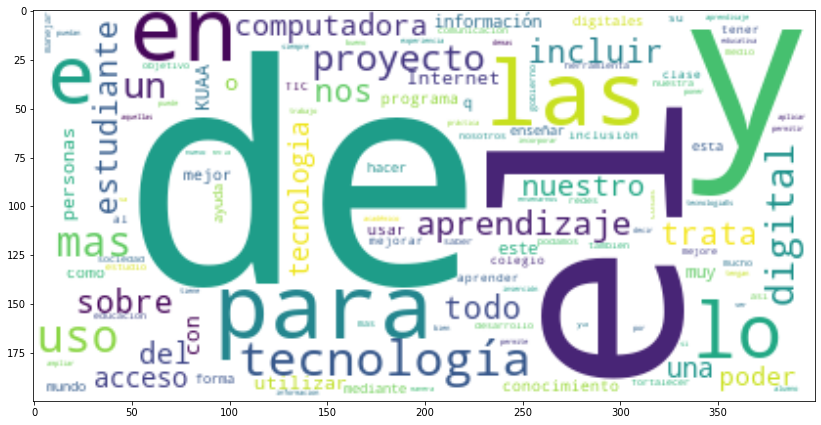

In [ ]:
# instanciar un objeto de tipo nube
nube = WordCloud(
    background_color='white', #fondo blanco
    max_words=2000, # las primeras 2000 palabras
    stopwords=stopwords,  # por si necesiramos eliminar alguna palabra luego, mas adelante
    collocations=False # corrige el error de que una palabra se repite en la imagen
)

# generar la nube de palabras 
nube.generate(texto)

# cambiar tamaño de imagen
fig = plt.figure()
fig.set_figwidth(14) # establecer ancho
fig.set_figheight(20) # establecer altura

# mostrar la nube de palabras
plt.imshow(nube, interpolation='bilinear')
plt.axis('on')
plt.show()

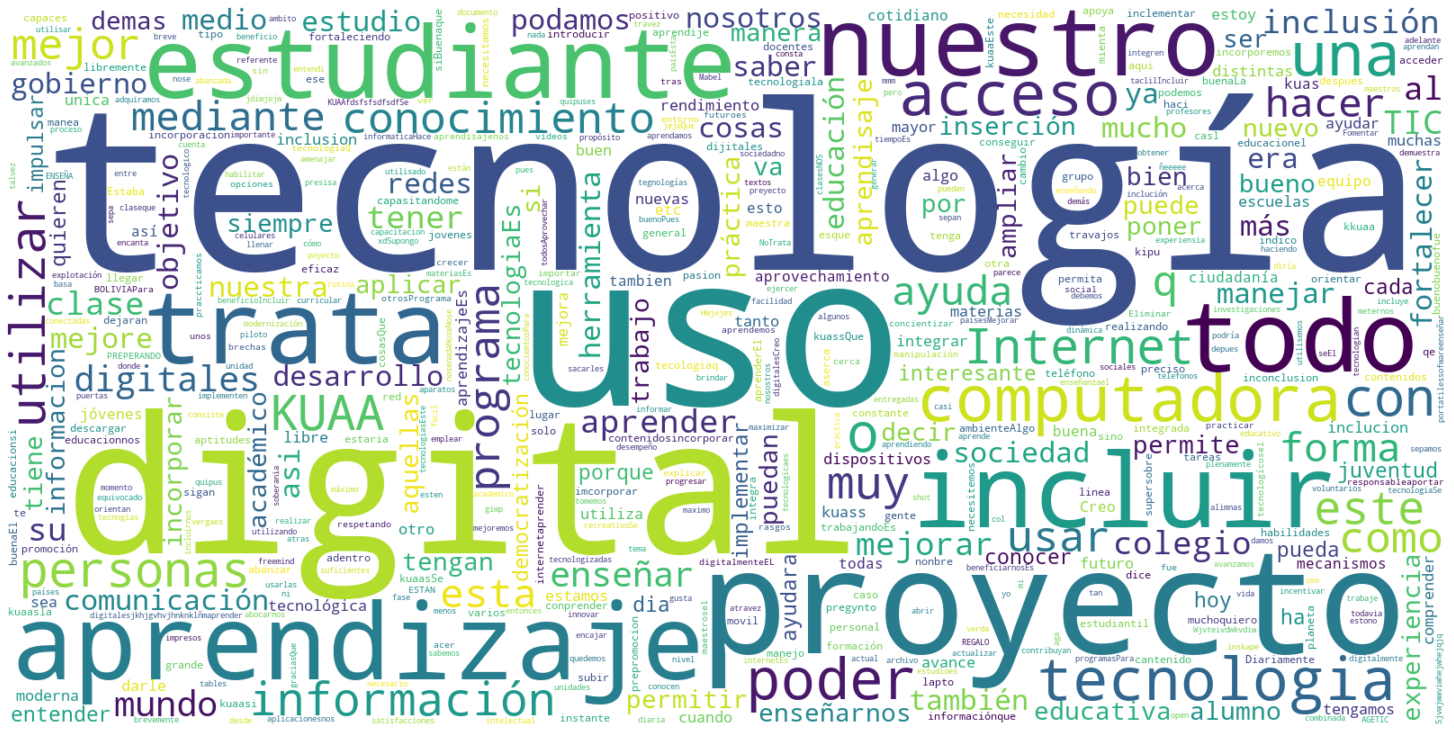

In [ ]:
stopwords.add('las') # añadir las palabras "said" a las palabras vacías 
stopwords.add('e')
stopwords.add('el')
stopwords.add('en')
stopwords.add('lo')
stopwords.add('los')
stopwords.add('es')
stopwords.add('un')
stopwords.add('mas')
stopwords.add('sobre')
stopwords.add('nos')
stopwords.add('del')


# instanciar un objeto de tipo nube
nube = WordCloud(
    background_color='white', #fondo blanco
    max_words=2000, # las primeras 2000 palabras
    stopwords=stopwords,  # por si necesiramos eliminar alguna palabra luego, mas adelante
    collocations=False, # corrige el error de que una palabra se repite en la imagen
    width=1600, height=800
)

# generar la nube de palabras 
nube.generate(texto)

# cambiar tamaño de imagen
fig = plt.figure(figsize=(20,10) ) # elimina bordes

#fig.set_figwidth(16) # establecer ancho
#fig.set_figheight(9) # establecer altura

# mostrar la nube de palabras
plt.imshow(nube, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()